In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [90]:
!pip install feature-engine

In [2]:
train=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\Data_Train3.csv')

In [3]:
train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
test=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\test.csv')

In [5]:
test.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL ? BOM ? COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU ? MAA ? BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL ? BOM ? COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL ? BOM ? COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [6]:
train.shape

(10683, 11)

In [7]:
test.shape

(2671, 10)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
train.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [11]:
test.describe()

Airline Date_of_Journey Source Destination            Route  \
count          2671            2671   2671        2671             2671   
unique           11              44      5           6              100   
top     Jet Airways       9/05/2019  Delhi      Cochin  DEL ? BOM ? COK   
freq            897             144   1145        1145              624   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count      2671         2671     2671        2671            2671  
unique      199          704      320           5               6  
top       10:00        19:00   2h 50m      1 stop         No info  
freq         62          113      122        1431            2148

In [12]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [14]:
df = train.append(test)

In [15]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

In [16]:
# Converting Date OF Journey into Day, Date and Month of Journey

df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [17]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0   

   Journey_Day  Journey_Month  weekday  
0           24              3        6  
1            1              5        2  
2            9              6        6  
3           12              5        6  
4            1              3        4

In [18]:
# drop the data of journey column as therequired features are extracted.
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [19]:
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR ? DEL    22:20   
1    Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL ? LKO ? BOM ? COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR ? NAG ? DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info    Price  Journey_Day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897.0           24   
1         13:15   7h 25m     2 stops         No info   7662.0            1   
2  04:25 10 Jun      19h     2 stops         No info  13882.0            9   
3         23:30   5h 25m      1 stop         No info   6218.0           12   
4         21:35   4h 45m      1 stop         No info  13302.0            1   

   Journey_Month  weekday  
0              3        6  
1              5        2  
2              6        6  
3              5        6  
4              3        4

In [20]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Journey_Day      13354 non-null  int64  
 11  Journey_Month    13354 non-null  int64  
 12  weekday          13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [22]:
import re

df['Mintues'] = df.Duration.apply(lambda x: x[-3:-1])

df.Duration = df.Duration.apply(lambda x: int(re.findall('\d+',x[:2])[0])*60)

df.Duration = df.Mintues.astype('int') + df.Duration

In [23]:
df.drop(labels='Mintues', axis=1, inplace=True)

In [24]:
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR ? DEL    22:20   
1    Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL ? LKO ? BOM ? COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR ? NAG ? DEL    16:50   

   Arrival_Time  Duration Total_Stops Additional_Info    Price  Journey_Day  \
0  01:10 22 Mar       170    non-stop         No info   3897.0           24   
1         13:15       445     2 stops         No info   7662.0            1   
2  04:25 10 Jun      1159     2 stops         No info  13882.0            9   
3         23:30       325      1 stop         No info   6218.0           12   
4         21:35       285      1 stop         No info  13302.0            1   

   Journey_Month  weekday  
0              3        6  
1              5        2  
2              6        6  
3              5        6  
4              3        4

In [25]:
#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [26]:
# Converting total_stops to 0,1,2,3 respectively
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)



pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [27]:
# mapping the month number with their respective names.


df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) 

In [28]:
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR ? DEL    Night   
1    Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR  Morning   
2  Jet Airways     Delhi      Cochin  DEL ? LKO ? BOM ? COK  Morning   
3       IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR  Evening   
4       IndiGo  Banglore   New Delhi        BLR ? NAG ? DEL  Evening   

  Arrival_Time  Duration Total_Stops Additional_Info    Price  Journey_Day  \
0        Night       170           0         No info   3897.0           24   
1    Afternoon       445           2         No info   7662.0            1   
2        Night      1159           2         No info  13882.0            9   
3        Night       325           1         No info   6218.0           12   
4        Night       285           1         No info  13302.0            1   

  Journey_Month  weekday  
0         March        6  
1           May        2  
2          June        6  
3           May        6  
4         March        4

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  int64  
 7   Total_Stops      13354 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Journey_Day      13354 non-null  int64  
 11  Journey_Month    13354 non-null  object 
 12  weekday          13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [30]:
# Dropping Redundant Columns

df=df.drop(['Arrival_Time'], axis=1) #this columns has no such effect on fare price

df=df.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [31]:
df.head()

Airline    Source Destination Dep_Time  Duration Total_Stops  \
0       IndiGo  Banglore   New Delhi    Night       170           0   
1    Air India   Kolkata    Banglore  Morning       445           2   
2  Jet Airways     Delhi      Cochin  Morning      1159           2   
3       IndiGo   Kolkata    Banglore  Evening       325           1   
4       IndiGo  Banglore   New Delhi  Evening       285           1   

  Additional_Info    Price  Journey_Day Journey_Month  weekday  
0         No info   3897.0           24         March        6  
1         No info   7662.0            1           May        2  
2         No info  13882.0            9          June        6  
3         No info   6218.0           12           May        6  
4         No info  13302.0            1         March        4

# CORRELATION

In [32]:
df.corr()

Duration     Price  Journey_Day   weekday
Duration     1.000000  0.506607    -0.022909 -0.008226
Price        0.506607  1.000000    -0.153738  0.051613
Journey_Day -0.022909 -0.153738     1.000000 -0.082577
weekday     -0.008226  0.051613    -0.082577  1.000000

<AxesSubplot:>

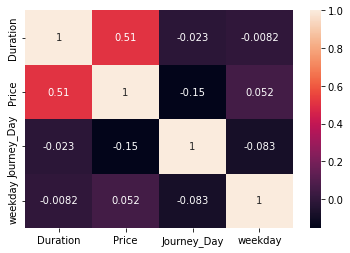

In [33]:
sns.heatmap(df.corr(),annot=True)

# Univariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='count'>

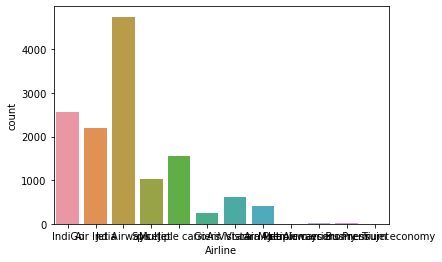

In [34]:
# helper function
# helper function
def figure_this_size(x,y):
    return plt.figure(figsize=(x,y))
sns.countplot(df.Airline)

In [35]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [36]:
#Jet Airways, Indigo & Air India Covers More than 70% of the Airlines
df.Source.value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

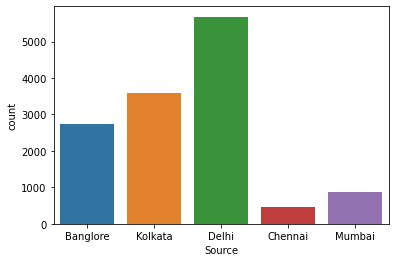

In [37]:
sns.countplot(df.Source)

<AxesSubplot:xlabel='Destination', ylabel='count'>

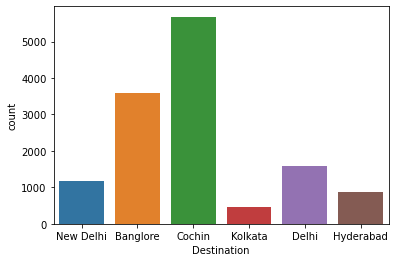

In [38]:
sns.countplot(df.Destination)

<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

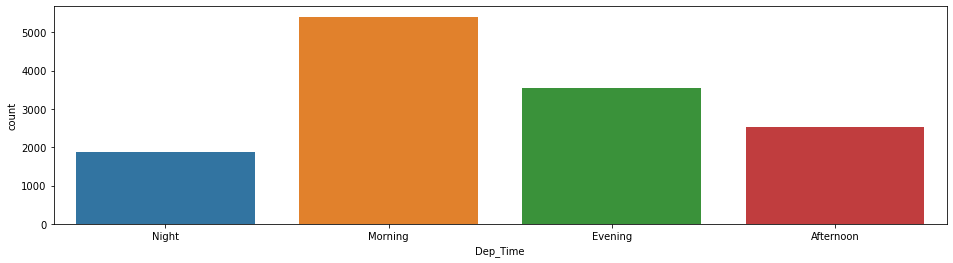

In [39]:
figure_this_size(16,4)
sns.countplot(df.Dep_Time)

<AxesSubplot:xlabel='Duration', ylabel='count'>

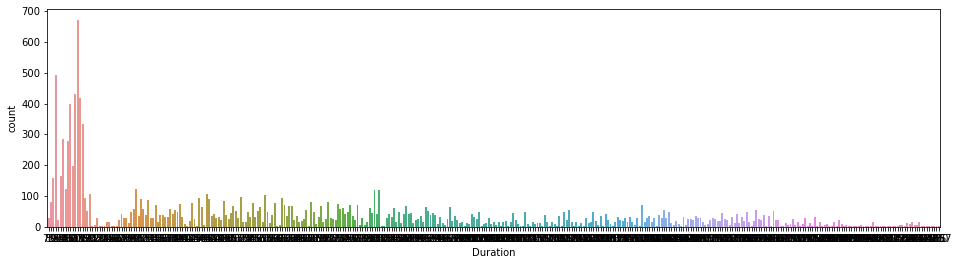

In [40]:
figure_this_size(16,4)
sns.countplot(df.Duration)

In [41]:
df.Duration.value_counts()

170     672
90      493
165     432
175     418
155     399
       ... 
2525      1
1975      1
1890      1
2120      1
1945      1
Name: Duration, Length: 367, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

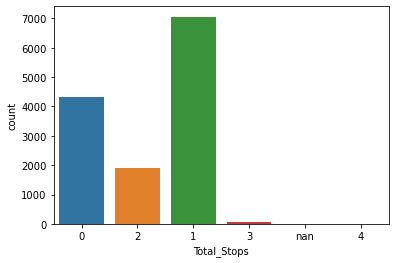

In [42]:
sns.countplot(df.Total_Stops)

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

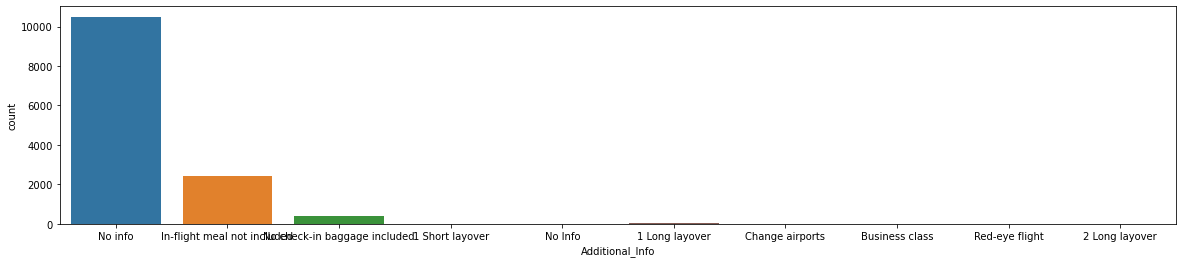

In [43]:
figure_this_size(20,4)
sns.countplot(df.Additional_Info)

In [44]:
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Journey_Month', ylabel='count'>

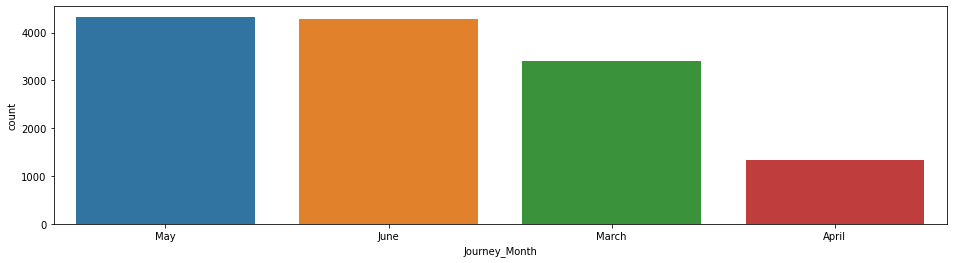

In [45]:
figure_this_size(16,4)
sns.countplot(df.Journey_Month,order=df.Journey_Month.value_counts().index)

<AxesSubplot:xlabel='weekday', ylabel='count'>

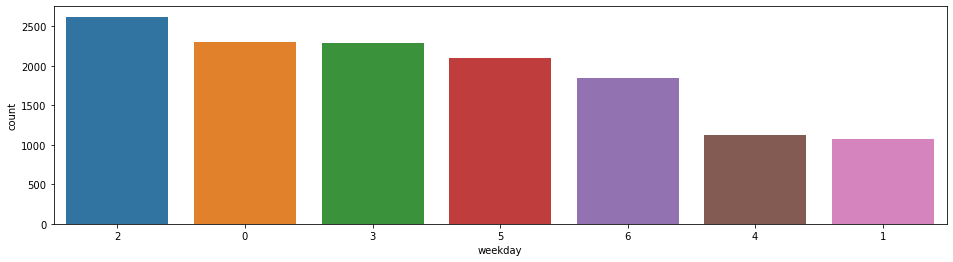

In [46]:
figure_this_size(16,4)
sns.countplot(df.weekday,order=df.weekday.value_counts().index)

# Multi-variate Analysis

<AxesSubplot:xlabel='Price', ylabel='Airline'>

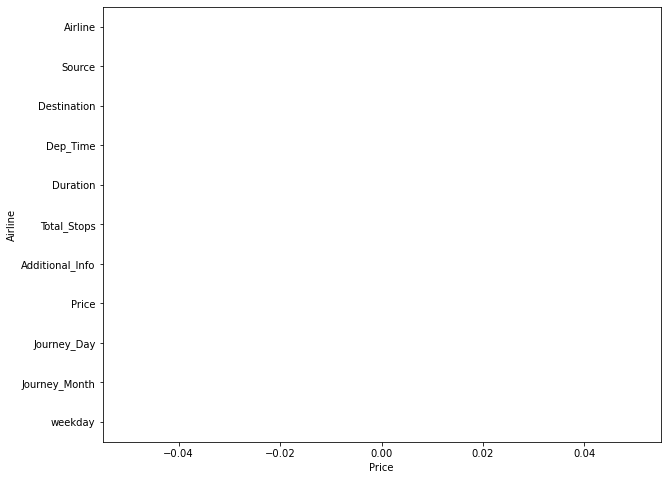

In [49]:
figure_this_size(10,8)
sns.barplot('Price','Airline', data=df,estimator=sum,orient='h',order = df)

In [50]:
df.head()

Airline    Source Destination Dep_Time  Duration Total_Stops  \
0       IndiGo  Banglore   New Delhi    Night       170           0   
1    Air India   Kolkata    Banglore  Morning       445           2   
2  Jet Airways     Delhi      Cochin  Morning      1159           2   
3       IndiGo   Kolkata    Banglore  Evening       325           1   
4       IndiGo  Banglore   New Delhi  Evening       285           1   

  Additional_Info    Price  Journey_Day Journey_Month  weekday  
0         No info   3897.0           24         March        6  
1         No info   7662.0            1           May        2  
2         No info  13882.0            9          June        6  
3         No info   6218.0           12           May        6  
4         No info  13302.0            1         March        4

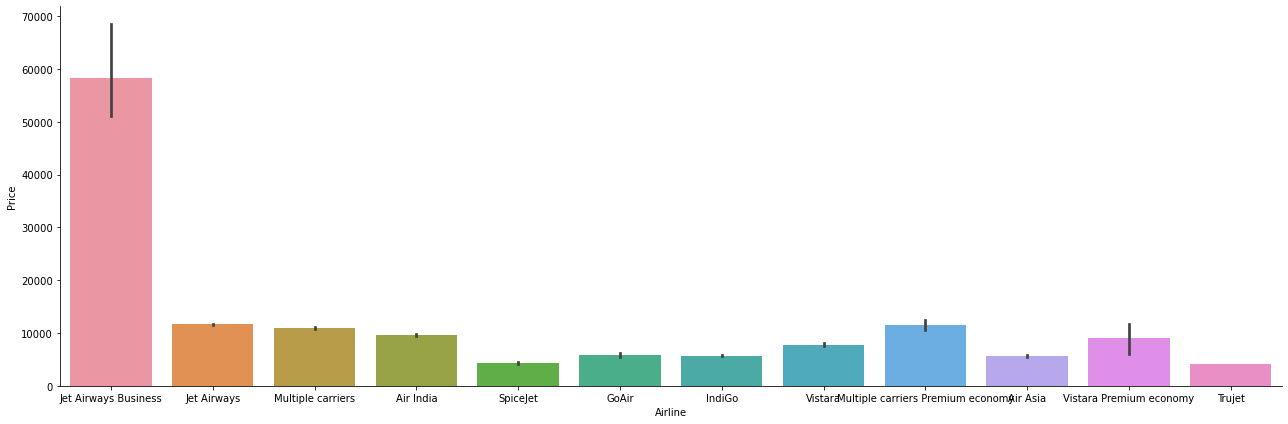

In [51]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

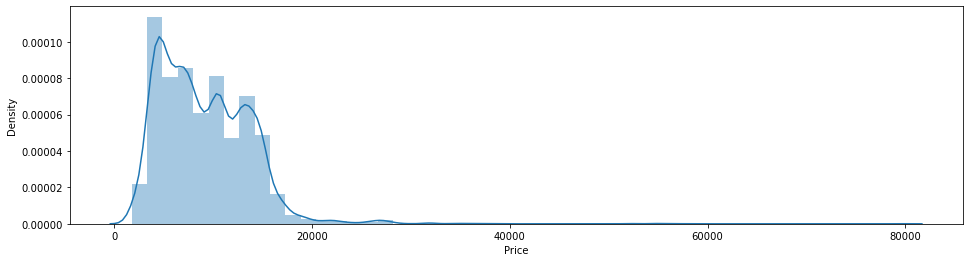

In [52]:
# Looking at Price distribution
figure_this_size(16,4)
sns.distplot(df['Price'])
plt.show()

In [53]:
df.groupby(['Journey_Month']).mean()

Duration         Price  Journey_Day   weekday
Journey_Month                                                 
April          380.868124   5770.847081    11.004521  2.202713
June           650.598927   8828.796134    12.178021  3.055063
March          689.081184  10673.205580    13.775791  3.514361
May            681.210672   9127.247548    15.016632  2.592285

In [54]:
df.groupby(['weekday']).mean()

Duration        Price  Journey_Day
weekday                                      
0        616.146077  8499.530811    13.653663
1        654.521375  9026.149597    17.436803
2        686.256009  9277.514190    12.080122
3        700.318441  8931.379367    14.586071
4        470.275647  9717.996700    14.067797
5        636.006676  8972.905389    12.087744
6        654.343970  9525.508820    12.150892

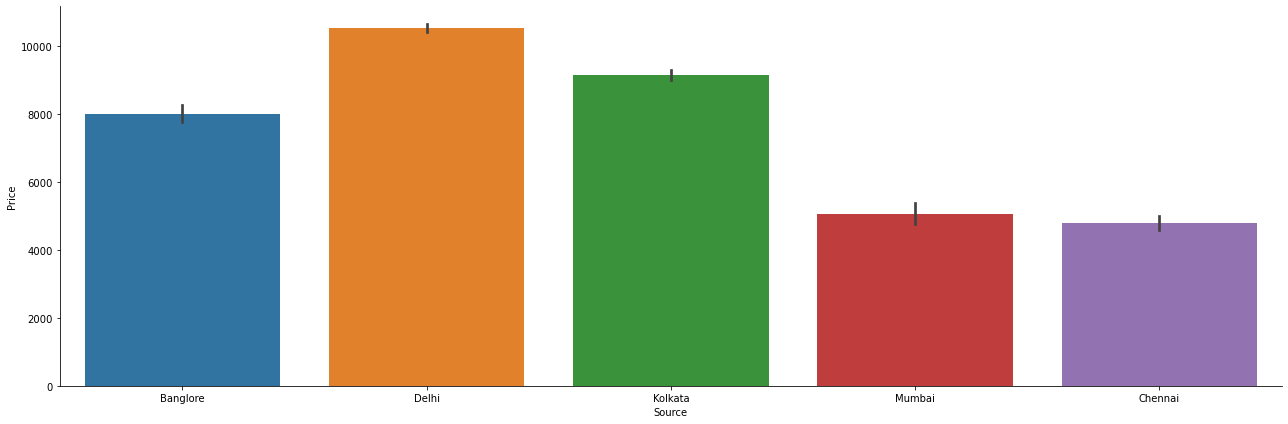

In [55]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

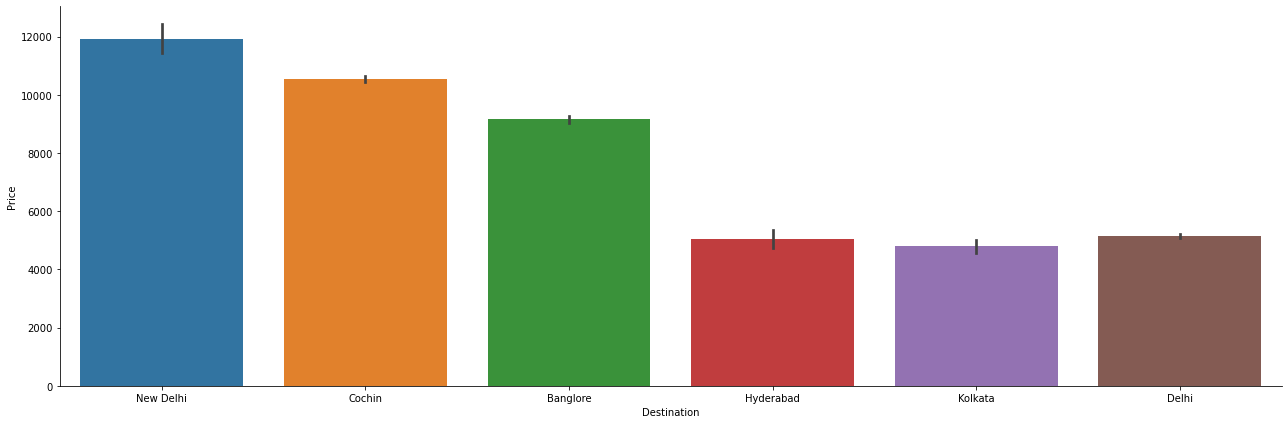

In [56]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

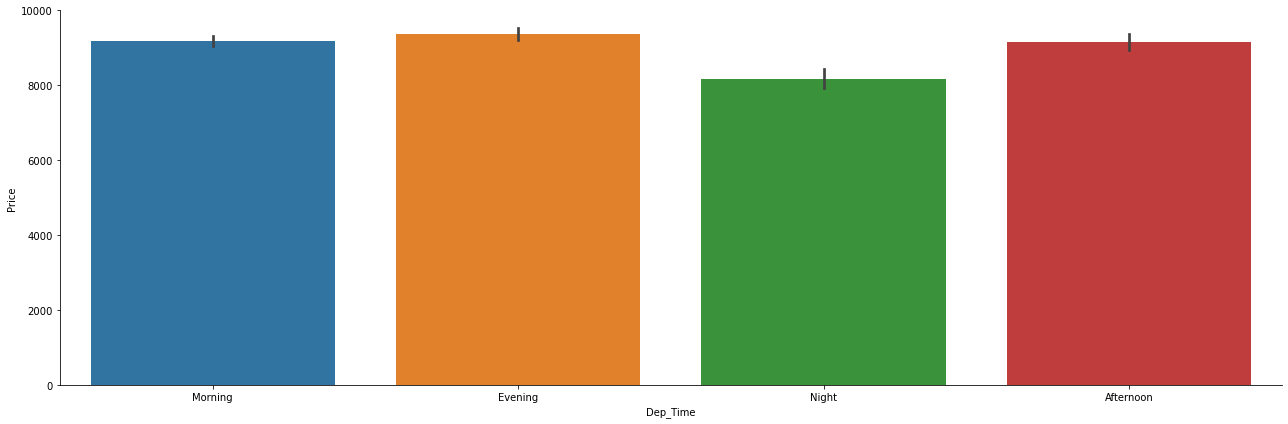

In [57]:
# Destination vs PRICE
sns.catplot(y='Price',x='Dep_Time',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

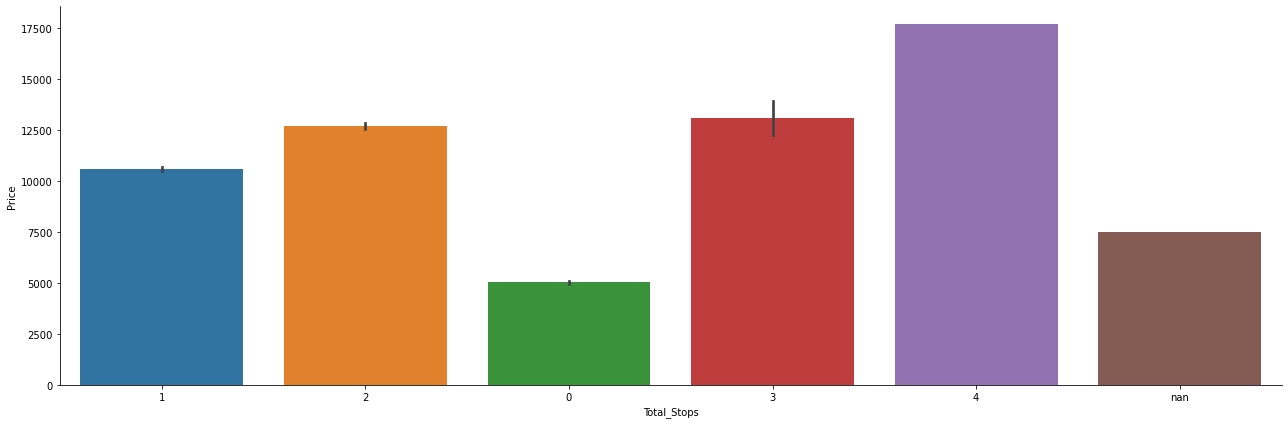

In [58]:
# Total_Stops Vs Price
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

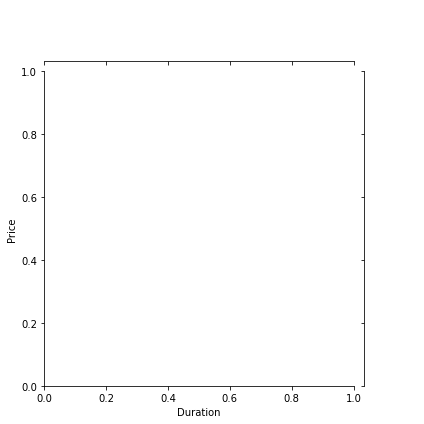

In [89]:
import scipy.stats as stats
dur = sns.jointplot(x='Duration',y='Price',data=df,kind = 'reg')
dur.annotate(stats.pearsonr)
plt.show()

In [60]:
df.head()

Airline    Source Destination Dep_Time  Duration Total_Stops  \
0       IndiGo  Banglore   New Delhi    Night       170           0   
1    Air India   Kolkata    Banglore  Morning       445           2   
2  Jet Airways     Delhi      Cochin  Morning      1159           2   
3       IndiGo   Kolkata    Banglore  Evening       325           1   
4       IndiGo  Banglore   New Delhi  Evening       285           1   

  Additional_Info    Price  Journey_Day Journey_Month  weekday  
0         No info   3897.0           24         March        6  
1         No info   7662.0            1           May        2  
2         No info  13882.0            9          June        6  
3         No info   6218.0           12           May        6  
4         No info  13302.0            1         March        4

In [61]:
df.Additional_Info.value_counts()/len(df) * 100

No info                         78.575708
In-flight meal not included     18.166841
No check-in baggage included     2.965404
1 Long layover                   0.149768
Change airports                  0.059907
Business class                   0.037442
No Info                          0.022465
1 Short layover                  0.007488
Red-eye flight                   0.007488
2 Long layover                   0.007488
Name: Additional_Info, dtype: float64

In [62]:
df.drop('Additional_Info',1,inplace=True)

In [63]:
df.head()

Airline    Source Destination Dep_Time  Duration Total_Stops    Price  \
0       IndiGo  Banglore   New Delhi    Night       170           0   3897.0   
1    Air India   Kolkata    Banglore  Morning       445           2   7662.0   
2  Jet Airways     Delhi      Cochin  Morning      1159           2  13882.0   
3       IndiGo   Kolkata    Banglore  Evening       325           1   6218.0   
4       IndiGo  Banglore   New Delhi  Evening       285           1  13302.0   

   Journey_Day Journey_Month  weekday  
0           24         March        6  
1            1           May        2  
2            9          June        6  
3           12           May        6  
4            1         March        4

# ONE HOT CODING

In [97]:
# sepearting the categorical and the numrical variables
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables
num_var = _find_numerical_variables(df)
cat_var = _find_categorical_variables(df)

ModuleNotFoundError: No module named 'feature_engine.missing_data_imputers'

In [65]:
num_var

NameError: name 'num_var' is not defined

In [66]:
cat_var

NameError: name 'cat_var' is not defined

In [67]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
onehot = OneHotCategoricalEncoder(variables=cat_var,drop_last=True)
df = onehot.fit_transform(df)

ModuleNotFoundError: No module named 'feature_engine.categorical_encoders'

In [68]:
df_train = df[~df.Price.isna()]
df_test = df[df.Price.isna()]


In [69]:
df_train.shape

(10683, 10)

In [70]:
df_test.shape

(2671, 10)

In [71]:
df_train

Airline    Source Destination   Dep_Time  Duration Total_Stops  \
0           IndiGo  Banglore   New Delhi      Night       170           0   
1        Air India   Kolkata    Banglore    Morning       445           2   
2      Jet Airways     Delhi      Cochin    Morning      1159           2   
3           IndiGo   Kolkata    Banglore    Evening       325           1   
4           IndiGo  Banglore   New Delhi    Evening       285           1   
...            ...       ...         ...        ...       ...         ...   
10678     Air Asia   Kolkata    Banglore    Evening       150           0   
10679    Air India   Kolkata    Banglore    Evening       155           0   
10680  Jet Airways  Banglore       Delhi    Morning       183           0   
10681      Vistara  Banglore   New Delhi  Afternoon       160           0   
10682    Air India     Delhi      Cochin    Morning       500           2   

         Price  Journey_Day Journey_Month  weekday  
0       3897.0           24         March        6  
1       7662.0            1           May        2  
2      13882.0            9          June        6  
3       6218.0           12           May        6  
4      13302.0            1         March        4  
...        ...          ...           ...      ...  
10678   4107.0            9         April        1  
10679   4145.0           27         April        5  
10680   7229.0           27         April        5  
10681  12648.0            1         March        4  
10682  11753.0            9           May        3  

[10683 rows x 10 columns]

In [72]:
df_test

Airline    Source Destination   Dep_Time  Duration  \
0           Jet Airways     Delhi      Cochin    Evening       655   
1                IndiGo   Kolkata    Banglore    Morning       244   
2           Jet Airways     Delhi      Cochin    Evening      1425   
3     Multiple carriers     Delhi      Cochin    Morning       793   
4              Air Asia  Banglore       Delhi      Night       170   
...                 ...       ...         ...        ...       ...   
2666          Air India   Kolkata    Banglore    Evening      1435   
2667             IndiGo   Kolkata    Banglore  Afternoon       155   
2668        Jet Airways     Delhi      Cochin      Night       395   
2669          Air India     Delhi      Cochin      Night       915   
2670  Multiple carriers     Delhi      Cochin      Night       860   

     Total_Stops  Price  Journey_Day Journey_Month  weekday  
0              1    NaN            6          June        3  
1              1    NaN           12           May        6  
2              1    NaN           21           May        1  
3              1    NaN           21           May        1  
4              0    NaN           24          June        0  
...          ...    ...          ...           ...      ...  
2666           1    NaN            6          June        3  
2667           0    NaN           27         March        2  
2668           1    NaN            6         March        2  
2669           1    NaN            6         March        2  
2670           1    NaN           15          June        5  

[2671 rows x 10 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        13354 non-null  object 
 1   Source         13354 non-null  object 
 2   Destination    13354 non-null  object 
 3   Dep_Time       13354 non-null  object 
 4   Duration       13354 non-null  int64  
 5   Total_Stops    13354 non-null  object 
 6   Price          10683 non-null  float64
 7   Journey_Day    13354 non-null  int64  
 8   Journey_Month  13354 non-null  object 
 9   weekday        13354 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.6+ MB


In [74]:
## reoving outliers from the train dataset.
z_scores = stats.zscore(df_train[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_train = df_train[filtered_entries]

NameError: name 'num_var' is not defined

In [75]:
df_train

Airline    Source Destination   Dep_Time  Duration Total_Stops  \
0           IndiGo  Banglore   New Delhi      Night       170           0   
1        Air India   Kolkata    Banglore    Morning       445           2   
2      Jet Airways     Delhi      Cochin    Morning      1159           2   
3           IndiGo   Kolkata    Banglore    Evening       325           1   
4           IndiGo  Banglore   New Delhi    Evening       285           1   
...            ...       ...         ...        ...       ...         ...   
10678     Air Asia   Kolkata    Banglore    Evening       150           0   
10679    Air India   Kolkata    Banglore    Evening       155           0   
10680  Jet Airways  Banglore       Delhi    Morning       183           0   
10681      Vistara  Banglore   New Delhi  Afternoon       160           0   
10682    Air India     Delhi      Cochin    Morning       500           2   

         Price  Journey_Day Journey_Month  weekday  
0       3897.0           24         March        6  
1       7662.0            1           May        2  
2      13882.0            9          June        6  
3       6218.0           12           May        6  
4      13302.0            1         March        4  
...        ...          ...           ...      ...  
10678   4107.0            9         April        1  
10679   4145.0           27         April        5  
10680   7229.0           27         April        5  
10681  12648.0            1         March        4  
10682  11753.0            9           May        3  

[10683 rows x 10 columns]

In [76]:
X = df_train.drop('Price',1)
y = df_train['Price']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)
# checking the shape
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((7478, 9), (7478,), (3205, 9), (3205,))

In [78]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [79]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    print('MSE:',mean_squared_error(y_val,y_preds))
    print('R2_Score',r2_score(y_val,y_preds))  

In [80]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

ValueError: could not convert string to float: 'Jet Airways'

In [86]:
# try2: Ridge Regression
train_n_ret_scores(Ridge())

ValueError: could not convert string to float: 'Jet Airways'

In [87]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

ValueError: could not convert string to float: 'Jet Airways'

In [ ]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

In [88]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear'))

ValueError: could not convert string to float: 'Jet Airways'

In [ ]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

In [ ]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

In [ ]:
# try7: Adaboost with DC

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

In [ ]:
# try8: Adaboost

train_n_ret_scores(AdaBoostRegressor())

In [ ]:
# try 9 : KNN
train_n_ret_scores(KNeighborsRegressor())

In [ ]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    mse = mean_squared_error(y_val,y_preds)
    r2 = r2_score(y_val,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)

In [ ]:
models_df

In [ ]:
best_model = RandomForestRegressor()
best_model.fit(X_train,y_train)
RandomForestRegressor()
best_model.score(X_val,y_val)

# Predicting on the test set

In [82]:
df_test.head()

Airline    Source Destination Dep_Time  Duration Total_Stops  \
0        Jet Airways     Delhi      Cochin  Evening       655           1   
1             IndiGo   Kolkata    Banglore  Morning       244           1   
2        Jet Airways     Delhi      Cochin  Evening      1425           1   
3  Multiple carriers     Delhi      Cochin  Morning       793           1   
4           Air Asia  Banglore       Delhi    Night       170           0   

   Price  Journey_Day Journey_Month  weekday  
0    NaN            6          June        3  
1    NaN           12           May        6  
2    NaN           21           May        1  
3    NaN           21           May        1  
4    NaN           24          June        0

In [83]:
df_test.drop('Price',1,inplace=True)
test_prediction = best_model.predict(df_test)

NameError: name 'best_model' is not defined

# Save the model

In [85]:
best_model = RandomForestRegressor()
best_model.fit(X_train,y_train)

best_model.score(X_val,y_val)

ValueError: could not convert string to float: 'Jet Airways'

In [84]:
import joblib
joblib.dump(best_model,'flight_price.pkl')

NameError: name 'best_model' is not defined